In [1]:
# Script completo para preprocesamiento de la imagen y resaltar diferencias entre carne (rojo) y grasa (blanco)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen original (usamos '001.jpg' como en tu notebook)
image_bgr = cv2.imread('../data/imgs/001.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


In [2]:

# Paso 1: Convertir a espacio de color LAB para mejorar contraste
lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
lab[:, :, 0] = clahe.apply(lab[:, :, 0])  # Aplicar solo a la luminancia

# Paso 2: Convertir de vuelta a RGB
image_clahe_rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Paso 3: Convertir a HSV
hsv = cv2.cvtColor(image_clahe_rgb, cv2.COLOR_RGB2HSV)

# Paso 4: Extraer canales útiles
hue = hsv[:, :, 0]        # tono
saturation = hsv[:, :, 1] # saturación
value = hsv[:, :, 2]      # brillo


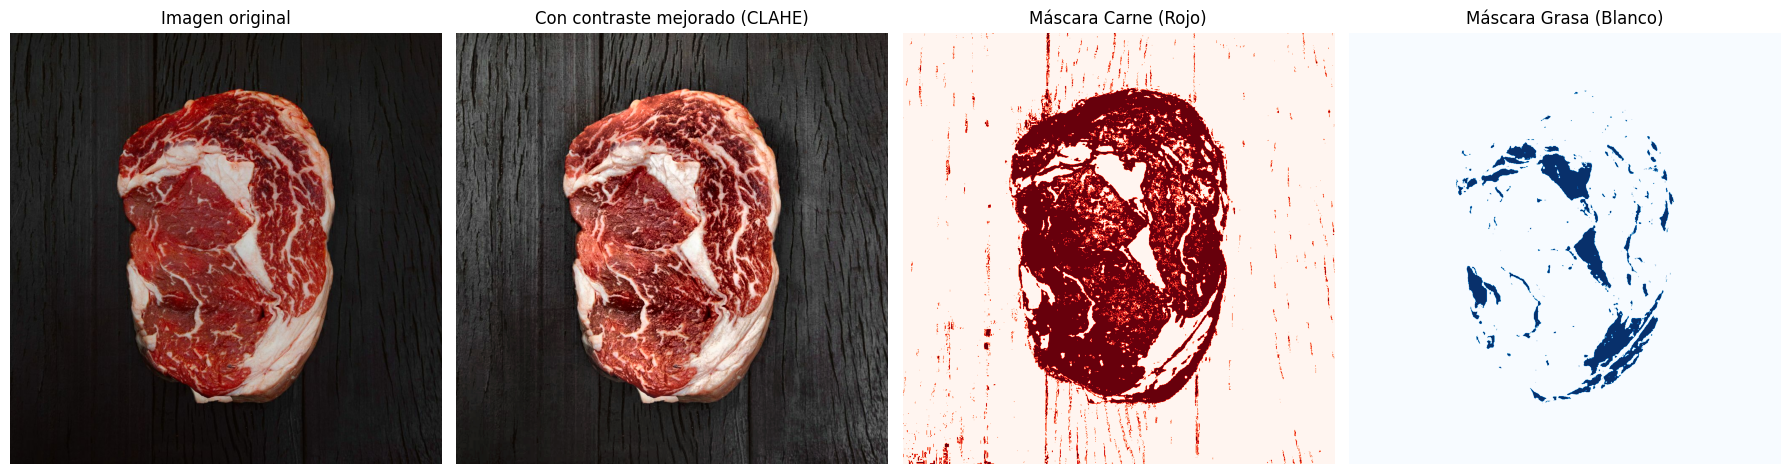

In [3]:

# Paso 5: Crear máscaras básicas por umbrales empíricos
# Carne: más saturación, tono rojizo
# Grasa: menos saturación, más valor (brillo)
mask_carne = (hue < 15) & (saturation > 60)
mask_grasa = (saturation < 50) & (value > 160)

# Paso 6: Visualización
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
axs[0].imshow(image_rgb)
axs[0].set_title("Imagen original")
axs[1].imshow(image_clahe_rgb)
axs[1].set_title("Con contraste mejorado (CLAHE)")
axs[2].imshow(mask_carne, cmap='Reds')
axs[2].set_title("Máscara Carne (Rojo)")
axs[3].imshow(mask_grasa, cmap='Blues')
axs[3].set_title("Máscara Grasa (Blanco)")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

